<a href="https://colab.research.google.com/github/Nongbon/INTERNSHIP_NARIT/blob/main/M_phot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math 
import seaborn as sns
from random import seed


In [20]:
!wget https://raw.githubusercontent.com/Nongbon/INTERNSHIP_NARIT/main/data_phot.csv

--2021-05-29 06:24:56--  https://raw.githubusercontent.com/Nongbon/INTERNSHIP_NARIT/main/data_phot.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24157 (24K) [text/plain]
Saving to: ‘data_phot.csv’

data_phot.csv       100%[===================>]  23.59K  --.-KB/s    in 0.001s  

2021-05-29 06:24:56 (30.0 MB/s) - ‘data_phot.csv’ saved [24157/24157]



In [21]:
data_phot = pd.read_csv("data_phot.csv").drop(['E(B-V)'],axis=1)
data_phot

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K,Kepmag
0,1433760,192.958633,190.228856,195.766455,0.053545,0.014017,0.003472,16.982,13.884,13.128,16.624
1,2831828,106.524990,105.009638,108.083913,0.019206,0.005028,0.001245,18.779,14.845,14.062,18.810
2,2971472,40.706364,40.647560,40.765336,0.009219,0.002413,0.000598,14.948,10.889,10.028,14.969
3,2983661,148.671765,147.470011,149.892912,0.042638,0.011162,0.002765,16.738,13.490,12.695,16.319
4,3101838,201.853369,199.615989,204.140557,0.066318,0.017361,0.004300,16.470,13.252,12.375,16.025
...,...,...,...,...,...,...,...,...,...,...,...
203,12508767,75.955190,75.746448,76.165065,0.019169,0.005018,0.001243,15.216,11.977,11.166,14.769
204,12645891,199.483571,195.889349,203.209705,0.032299,0.008455,0.002094,17.989,14.318,13.638,17.990
205,12735831,68.307667,68.080168,68.536664,0.013548,0.003546,0.000878,16.321,12.940,12.163,16.329
206,12784248,79.894261,79.242447,80.556692,0.020554,0.005381,0.001333,18.788,14.281,13.403,18.772


In [22]:
data_phot['d_hi-d'] = data_phot.d_hi - data_phot.d_est
data_phot['d_lo-d'] = data_phot.d_lo - data_phot.d_est
data_phot['sd_d'] = (data_phot['d_hi-d'] + data_phot['d_lo-d']) / 2 
data_phot

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K,Kepmag,d_hi-d,d_lo-d,sd_d
0,1433760,192.958633,190.228856,195.766455,0.053545,0.014017,0.003472,16.982,13.884,13.128,16.624,2.807822,-2.729777,0.039023
1,2831828,106.524990,105.009638,108.083913,0.019206,0.005028,0.001245,18.779,14.845,14.062,18.810,1.558923,-1.515352,0.021786
2,2971472,40.706364,40.647560,40.765336,0.009219,0.002413,0.000598,14.948,10.889,10.028,14.969,0.058972,-0.058804,0.000084
3,2983661,148.671765,147.470011,149.892912,0.042638,0.011162,0.002765,16.738,13.490,12.695,16.319,1.221147,-1.201754,0.009696
4,3101838,201.853369,199.615989,204.140557,0.066318,0.017361,0.004300,16.470,13.252,12.375,16.025,2.287188,-2.237380,0.024904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,12508767,75.955190,75.746448,76.165065,0.019169,0.005018,0.001243,15.216,11.977,11.166,14.769,0.209875,-0.208742,0.000567
204,12645891,199.483571,195.889349,203.209705,0.032299,0.008455,0.002094,17.989,14.318,13.638,17.990,3.726134,-3.594222,0.065956
205,12735831,68.307667,68.080168,68.536664,0.013548,0.003546,0.000878,16.321,12.940,12.163,16.329,0.228997,-0.227499,0.000749
206,12784248,79.894261,79.242447,80.556692,0.020554,0.005381,0.001333,18.788,14.281,13.403,18.772,0.662431,-0.651813,0.005309


In [23]:
#GENERATE
data_sample_d = []
data_sample_d = pd.DataFrame(data_sample_d)

for i in range(208) :
  data_sample_d[i] = np.random.normal(data_phot.d_est[i] , data_phot.sd_d[i], 10**4) 
  

In [24]:
data_sample_d

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207
0,192.969688,106.538288,40.706379,148.672673,201.843814,111.974641,144.112978,45.524157,172.630777,23.997051,110.173438,178.814787,202.476755,139.255915,163.739276,83.719994,27.729982,45.275922,100.477746,41.655654,92.933016,194.443968,111.368759,152.267802,53.109354,157.365512,154.267393,66.221684,148.785746,474.207628,134.824962,113.823970,194.010993,98.347887,109.553565,91.613828,78.446277,261.480822,71.057326,124.085645,...,315.082473,97.840453,92.824532,244.548244,109.753554,132.841742,144.082528,231.253023,144.070037,132.845436,51.680747,188.049071,317.197666,60.037764,85.440048,157.840243,134.857791,192.330528,97.085718,173.527850,58.283355,183.768566,190.336652,107.879384,101.437016,64.541684,219.811827,159.133254,217.541300,141.877456,301.457814,121.709888,162.909429,249.210700,80.201965,75.955248,199.535191,68.307074,79.887723,126.620669
1,192.997135,106.531500,40.706415,148.692376,201.816876,111.967061,144.121581,45.524059,172.695754,23.997052,110.173770,178.839816,202.429660,139.251084,163.705856,83.718349,27.730570,45.275996,100.475773,41.655616,92.934233,194.473289,111.371200,152.263366,53.110241,157.402051,154.260695,66.221385,148.791501,474.534060,134.727766,113.812092,194.074832,98.350440,109.548141,91.607785,78.447010,261.244175,71.056880,124.096123,...,312.841190,97.838521,92.821654,244.477177,109.747674,132.840783,144.068230,231.181438,144.091286,132.841843,51.680943,187.949732,317.112754,60.037363,85.438390,157.854869,134.889844,192.353141,97.095376,173.518701,58.283084,183.872126,190.302376,107.882832,101.518305,64.193391,219.846862,159.117556,217.549833,141.896786,301.405530,121.748745,162.900325,249.222718,80.201129,75.954992,199.435814,68.307485,79.885431,126.625244
2,192.934341,106.531908,40.706489,148.674265,201.823802,111.970808,144.107428,45.524102,172.654550,23.997087,110.160412,178.833296,202.393362,139.244102,163.737410,83.717870,27.730342,45.276074,100.475388,41.655722,92.927675,194.452407,111.368959,152.198863,53.110605,157.365517,154.262083,66.220381,148.944692,474.713995,134.543572,113.837627,192.892277,98.352643,109.553473,91.607256,78.446885,261.458082,71.058406,124.101241,...,314.725704,97.841651,92.832624,244.429790,109.750933,132.831399,144.043068,231.280819,144.073764,132.841625,51.680935,188.005394,317.086590,60.037368,85.438911,157.833499,134.842075,192.366909,97.105066,173.525922,58.282876,183.653530,190.292093,107.874777,101.455603,64.074407,219.826060,159.103512,217.580080,141.874314,301.547545,121.699068,162.897685,249.075948,80.202516,75.954882,199.512821,68.307353,79.887682,126.630633
3,192.891978,106.534035,40.706567,148.684939,201.833720,111.974510,144.107425,45.524108,172.628673,23.997048,110.175196,178.802821,202.361121,139.242817,163.775501,83.718463,27.729770,45.276004,100.476000,41.655515,92.933810,194.457591,111.369636,152.169971,53.111194,157.373758,154.256945,66.222405,148.884612,473.866568,134.952348,113.810778,192.931502,98.348272,109.548025,91.604272,78.446737,261.285862,71.056929,124.090687,...,314.063697,97.837232,92.832517,244.509979,109.752148,132.840861,144.036233,231.252567,144.060538,132.840969,51.680634,187.994892,317.092021,60.037498,85.436803,157.845425,134.805990,192.363713,97.098768,173.533661,58.284325,183.864554,190.318291,107.877571,101.527786,64.310070,219.806472,159.105836,217.544966,141.884734,301.640515,121.713337,162.901109,249.048645,80.201065,75.955001,199.441447,68.308362,79.889166,126.628274
4,192.929347,106.543493,40.706337,148.676965,201.830932,111.966704,144.104848,45.524167,172.669290,23.997072,110.161812,178.890509,202.361142,139.255789,163.703788,83.718442,27.730099,45.275870,100.476001,41.655553,92.931089,194.449173,111.368840,152.293855,53.110058,157.382920,154.26

In [25]:
# M = m - 5[log(d)-1] - A
M_r = []
M_r = pd.DataFrame(M_r)
M_J = []
M_J = pd.DataFrame(M_J)
M_K = []
M_K = pd.DataFrame(M_K)
def M() :
  for i in range(208) :
    M_r[i] = data_phot.r[i] - (5 * (np.log10(data_sample_d[i])-1)) - data_phot.A_r[i]
    M_J[i] = data_phot.J[i] - (5 * (np.log10(data_sample_d[i])-1)) - data_phot.A_J[i]
    M_K[i] = data_phot.K[i] - (5 * (np.log10(data_sample_d[i])-1)) - data_phot.A_K[i]

M()

In [26]:
M_r = M_r.T
M_J = M_J.T
M_K = M_K.T

In [27]:
#Find Median each M
M_r['Median'] = np.median(M_r,axis=1)
M_J['Median'] = np.median(M_J,axis=1)
M_K['Median'] = np.median(M_K,axis=1)

In [28]:
print(M_r)
print(M_J)
print(M_K)

             0          1          2  ...       9998       9999     Median
0    10.501009  10.500701  10.501407  ...  10.500635  10.501164  10.501136
1    13.622265  13.622404  13.622395  ...  13.622505  13.622996  13.622533
2    11.890469  11.890467  11.890463  ...  11.890465  11.890464  11.890469
3    10.834206  10.833918  10.834183  ...  10.834313  10.834116  10.834224
4     9.878605   9.878895   9.878820  ...   9.878352   9.878718   9.878503
..         ...        ...        ...  ...        ...        ...        ...
203  10.794042  10.794050  10.794053  ...  10.794033  10.794034  10.794044
204  11.456603  11.457685  11.456847  ...  11.457187  11.457804  11.457153
205  12.135124  12.135111  12.135115  ...  12.135131  12.135105  12.135105
206  14.255046  14.255108  14.255047  ...  14.254975  14.255147  14.254869
207  11.202446  11.202368  11.202275  ...  11.201981  11.202451  11.202387

[208 rows x 10001 columns]
            0         1         2  ...      9998      9999    Median
0  

In [ ]:
#M_r.to_csv("M_r_phot.csv") 
#M_J.to_csv("M_J_phot.csv")
#M_K.to_csv("M_K_phot.csv")

In [29]:
#Find percentage 14 & 86
M_r['Percen14'] = np.percentile(M_r,14,axis=1)
M_r['Percen86'] = np.percentile(M_r,86,axis=1)
M_J['Percen14'] = np.percentile(M_J,14,axis=1)
M_J['Percen86'] = np.percentile(M_J,86,axis=1)
M_K['Percen14'] = np.percentile(M_K,14,axis=1)
M_K['Percen86'] = np.percentile(M_K,86,axis=1)

In [30]:
#Find Error
M_r['M-'] = M_r['Percen14'] - M_r['Median']
M_r['M+'] = M_r['Percen86'] - M_r['Median']
M_J['M-'] = M_J['Percen14'] - M_J['Median']
M_J['M+'] = M_J['Percen86'] - M_J['Median']
M_K['M-'] = M_K['Percen14'] - M_K['Median']
M_K['M+'] = M_K['Percen86'] - M_K['Median']

In [31]:
M_K

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999,Median,Percen14,Percen86,M-,M+
0,6.697083,6.696774,6.697480,6.697957,6.697537,6.696641,6.696853,6.697306,6.697210,6.697485,6.696426,6.697012,6.697467,6.696856,6.697536,6.696957,6.697413,6.697148,6.697387,6.697276,6.697438,6.697119,6.696593,6.697833,6.697857,6.697353,6.697098,6.696704,6.696884,6.697526,6.697627,6.696328,6.696977,6.697284,6.696800,6.696959,6.697906,6.697257,6.697524,6.697421,...,6.697951,6.697196,6.697030,6.697844,6.697614,6.697104,6.697530,6.696996,6.698174,6.697024,6.696929,6.697521,6.696865,6.698078,6.697283,6.697493,6.697472,6.696798,6.696561,6.697363,6.696651,6.697575,6.696966,6.696732,6.697981,6.696628,6.697716,6.697088,6.696932,6.697740,6.697679,6.696881,6.697008,6.696708,6.697238,6.697209,6.696738,6.697688,-0.000471,0.000479
1,8.923226,8.923364,8.923356,8.923313,8.923120,8.923736,8.923230,8.923254,8.923561,8.923628,8.923276,8.923898,8.923648,8.924021,8.923312,8.923249,8.923343,8.923778,8.923327,8.923859,8.924266,8.922970,8.923003,8.923207,8.923538,8.923590,8.923625,8.923813,8.924153,8.923241,8.923616,8.922711,8.923899,8.924024,8.922956,8.923260,8.923934,8.923000,8.923027,8.924070,...,8.922719,8.923722,8.924230,8.923351,8.923868,8.923087,8.924120,8.923955,8.924090,8.923230,8.923728,8.923274,8.923094,8.923659,8.924244,8.924018,8.923881,8.923463,8.923420,8.923209,8.922778,8.923734,8.923789,8.923388,8.922830,8.923394,8.923644,8.923786,8.924113,8.923538,8.923632,8.923588,8.923429,8.923466,8.923957,8.923494,8.923031,8.923970,-0.000463,0.000476
2,6.979090,6.979088,6.979084,6.979080,6.979092,6.979092,6.979097,6.979089,6.979091,6.979095,6.979095,6.979086,6.979084,6.979087,6.979088,6.979089,6.979087,6.979092,6.979093,6.979094,6.979086,6.979092,6.979091,6.979083,6.979086,6.979084,6.979086,6.979089,6.979089,6.979092,6.979089,6.979101,6.979091,6.979090,6.979091,6.979087,6.979082,6.979085,6.979091,6.979097,...,6.979091,6.979097,6.979088,6.979094,6.979094,6.979087,6.979096,6.979093,6.979088,6.979082,6.979092,6.979095,6.979084,6.979094,6.979093,6.979090,6.979096,6.979088,6.979104,6.979092,6.979088,6.979093,6.979087,6.979090,6.979095,6.979091,6.979092,6.979091,6.979095,6.979089,6.979086,6.979096,6.979090,6.979086,6.979085,6.979091,6.979086,6.979096,-0.000005,0.000005
3,6.831080,6.830792,6.831056,6.830900,6.831017,6.830950,6.830921,6.831090,6.831296,6.831013,6.830924,6.831102,6.831306,6.831019,6.831327,6.830924,6.831120,6.831315,6.830989,6.831174,6.831134,6.830976,6.831234,6.831289,6.831108,6.831157,6.831183,6.831186,6.831171,6.831095,6.831103,6.830900,6.830940,6.830943,6.831032,6.830861,6.831083,6.831201,6.831035,6.831260,...,6.831063,6.830861,6.831002,6.831325,6.831052,6.831124,6.831145,6.831064,6.830877,6.831052,6.831209,6.831081,6.830959,6.830869,6.831183,6.830966,6.831257,6.831135,6.830924,6.831115,6.830998,6.831098,6.830921,6.830982,6.831021,6.831100,6.831324,6.831013,6.830953,6.831231,6.831013,6.831188,6.831040,6.831187,6.830990,6.831097,6.830943,6.831248,-0.000154,0.000151
4,5.845623,5.845913,5.845838,5.845731,5.845761,5.845249,5.845645,5.846073,5.845245,5.845804,5.845419,5.845609,5.846199,5.845154,5.845611,5.845215,5.845481,5.845363,5.845665,5.845627,5.845569,5.845408,5.845574,5.845602,5.845048,5.845166,5.845619,5.845692,5.845390,5.845864,5.845603,5.845239,5.845397,5.844993,5.845338,5.845570,5.845769,5.845544,5.845833,5.845681,...,5.845703,5.845186,5.845450,5.845292,5.845163,5.845436,5.845867,5.845467,5.845868,5.845869,5.845550,5.845248,5.845283,5.845676,5.845615,5.845649,5.845511,5.846148,5.845161,5.845244,5.845199,5.845574,5.845320,5.845622,5.845808,5.845295,5.845390,5.845368,5.845587,5.846068,5.845967,5.845271,5.845919,5.845370,5.845735,5.845521,5.845229,5.845810,-0.000292,0.000289
...,...,...,...,...,...,...,...,...,...,...,

In [37]:
#build RMS(Mag)
for i in range(208) : 
  if round(data_phot['Kepmag'][i]) < 16 :
    rms = 0.018
  elif round(data_phot['Kepmag'][i]) == 12 :
    rms = 0.017
  elif round(data_phot['Kepmag'][i]) == 13 :
    rms = 0.016
  elif round(data_phot['Kepmag'][i]) == 14 :
    rms = 0.015
  elif round(data_phot['Kepmag'][i]) == 15 :
    rms = 0.018
  elif round(data_phot['Kepmag'][i]) == 16 :
    rms = 0.025
  elif round(data_phot['Kepmag'][i]) == 17 :
    rms = 0.04
  else :
    rms = 0.06
  data_phot['rms'][i] = rms
  print(i,rms)

0 0.04
1 0.06
2 0.018
3 0.025
4 0.025
5 0.025
6 0.018
7 0.018
8 0.04
9 0.018
10 0.04
11 0.06
12 0.04
13 0.06
14 0.06
15 0.025
16 0.018
17 0.018
18 0.018
19 0.018
20 0.04
21 0.025
22 0.018
23 0.018
24 0.025
25 0.018
26 0.018
27 0.025
28 0.025
29 0.04
30 0.06
31 0.04
32 0.025
33 0.04
34 0.04
35 0.06
36 0.018
37 0.04
38 0.04
39 0.025
40 0.025
41 0.025
42 0.025
43 0.018
44 0.025
45 0.04
46 0.018
47 0.025
48 0.06
49 0.025
50 0.025
51 0.04
52 0.06
53 0.04
54 0.025
55 0.025
56 0.018
57 0.025
58 0.018
59 0.025
60 0.04
61 0.018
62 0.06
63 0.025
64 0.06
65 0.06
66 0.025
67 0.018
68 0.06
69 0.04
70 0.04
71 0.04
72 0.025
73 0.06
74 0.018
75 0.06
76 0.025
77 0.06
78 0.04
79 0.018
80 0.04
81 0.025
82 0.06
83 0.025
84 0.018
85 0.04
86 0.025
87 0.025
88 0.06
89 0.04
90 0.06
91 0.025
92 0.06
93 0.025
94 0.025
95 0.06
96 0.025
97 0.018
98 0.04
99 0.04
100 0.018
101 0.018
102 0.025
103 0.018
104 0.018
105 0.025
106 0.04
107 0.025
108 0.025
109 0.018
110 0.018
111 0.06
112 0.04
113 0.04
114 0.04
115 0.025

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [38]:
data_phot

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K,Kepmag,d_hi-d,d_lo-d,sd_d,rms
0,1433760,192.958633,190.228856,195.766455,0.053545,0.014017,0.003472,16.982,13.884,13.128,16.624,2.807822,-2.729777,0.039023,0.040
1,2831828,106.524990,105.009638,108.083913,0.019206,0.005028,0.001245,18.779,14.845,14.062,18.810,1.558923,-1.515352,0.021786,0.060
2,2971472,40.706364,40.647560,40.765336,0.009219,0.002413,0.000598,14.948,10.889,10.028,14.969,0.058972,-0.058804,0.000084,0.018
3,2983661,148.671765,147.470011,149.892912,0.042638,0.011162,0.002765,16.738,13.490,12.695,16.319,1.221147,-1.201754,0.009696,0.025
4,3101838,201.853369,199.615989,204.140557,0.066318,0.017361,0.004300,16.470,13.252,12.375,16.025,2.287188,-2.237380,0.024904,0.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,12508767,75.955190,75.746448,76.165065,0.019169,0.005018,0.001243,15.216,11.977,11.166,14.769,0.209875,-0.208742,0.000567,0.018
204,12645891,199.483571,195.889349,203.209705,0.032299,0.008455,0.002094,17.989,14.318,13.638,17.990,3.726134,-3.594222,0.065956,0.060
205,12735831,68.307667,68.080168,68.536664,0.013548,0.003546,0.000878,16.321,12.940,12.163,16.329,0.228997,-0.227499,0.000749,0.025
206,12784248,79.894261,79.242447,80.556692,0.020554,0.005381,0.001333,18.788,14.281,13.403,18.772,0.662431,-0.651813,0.005309,0.060


In [39]:
#build sd_r
data_phot['sd_r'] = data_phot['r'] * data_phot['rms']

In [40]:
data_phot

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K,Kepmag,d_hi-d,d_lo-d,sd_d,rms,sd_r
0,1433760,192.958633,190.228856,195.766455,0.053545,0.014017,0.003472,16.982,13.884,13.128,16.624,2.807822,-2.729777,0.039023,0.040,0.679280
1,2831828,106.524990,105.009638,108.083913,0.019206,0.005028,0.001245,18.779,14.845,14.062,18.810,1.558923,-1.515352,0.021786,0.060,1.126740
2,2971472,40.706364,40.647560,40.765336,0.009219,0.002413,0.000598,14.948,10.889,10.028,14.969,0.058972,-0.058804,0.000084,0.018,0.269064
3,2983661,148.671765,147.470011,149.892912,0.042638,0.011162,0.002765,16.738,13.490,12.695,16.319,1.221147,-1.201754,0.009696,0.025,0.418450
4,3101838,201.853369,199.615989,204.140557,0.066318,0.017361,0.004300,16.470,13.252,12.375,16.025,2.287188,-2.237380,0.024904,0.025,0.411750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,12508767,75.955190,75.746448,76.165065,0.019169,0.005018,0.001243,15.216,11.977,11.166,14.769,0.209875,-0.208742,0.000567,0.018,0.273888
204,12645891,199.483571,195.889349,203.209705,0.032299,0.008455,0.002094,17.989,14.318,13.638,17.990,3.726134,-3.594222,0.065956,0.060,1.079340
205,12735831,68.307667,68.080168,68.536664,0.013548,0.003546,0.000878,16.321,12.940,12.163,16.329,0.228997,-0.227499,0.000749,0.025,0.408025
206,12784248,79.894261,79.242447,80.556692,0.020554,0.005381,0.001333,18.788,14.281,13.403,18.772,0.662431,-0.651813,0.005309,0.060,1.127280


In [41]:
#GENERATE r
data_sample_r = []
data_sample_r = pd.DataFrame(data_sample_r)

for i in range(208) :
  data_sample_r[i] = np.random.normal(data_phot.r[i] , data_phot.sd_r[i], 10**4) 
  

In [42]:
data_sample_r.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,17.590857,17.659058,17.204407,16.990109,16.481015,17.898120,18.041444,16.286434,15.860314,18.387836,16.556811,17.370177,16.077197,18.246823,17.745124,16.910494,16.733734,16.854178,17.512851,16.770517,15.831991,17.530915,17.127406,17.315026,16.607493,17.545820,17.254083,18.293222,17.001511,17.543237,16.248084,16.076115,16.509829,16.577658,17.228557,16.185425,16.996568,16.728977,18.291906,15.635900,...,15.859954,17.615913,17.718692,16.041153,16.684568,18.191304,17.542680,16.338473,16.298646,16.931572,17.644856,16.084809,17.543605,17.385776,17.560066,16.978298,16.978057,16.012150,18.133969,17.163985,17.033665,14.922097,17.386885,16.787797,15.221769,17.204120,16.859341,15.661575,17.309530,16.167675,17.473811,16.464902,18.032119,17.159966,16.692970,17.538216,17.154678,17.385640,18.354104,15.682398
1,17.409396,19.251219,17.603692,16.630489,17.223196,19.141037,15.972935,18.468752,18.385472,18.834708,18.427090,17.846448,18.741015,19.435851,18.215014,18.411143,15.655587,19.664373,19.237183,16.779903,18.133309,20.896287,19.705165,18.120331,19.638665,19.407236,21.128369,16.667423,17.719064,16.480945,19.497653,18.346323,18.891481,18.621590,17.775021,18.245137,18.980951,19.382681,18.404927,17.125167,...,18.784416,18.930777,20.420082,18.189857,19.127568,17.692255,17.864526,19.201670,19.972885,20.263254,18.994405,18.435424,15.906678,17.804363,19.144273,17.987873,18.961462,19.098462,19.791766,19.888085,16.121541,18.904664,18.717594,16.268526,19.666361,20.092340,17.906935,17.344037,19.319708,19.347135,17.002561,18.247969,18.553137,20.151586,19.352722,20.471648,20.077438,18.054372,18.781804,19.830114
2,15.041117,15.020948,15.140815,14.958501,14.741904,14.498680,14.906010,14.792966,14.373740,14.832695,15.022637,15.232413,14.333730,14.706714,15.640413,15.224517,15.518219,15.259199,15.267513,14.927525,15.011971,14.834300,15.254319,15.356318,15.249934,15.185736,15.058450,15.386370,14.683894,15.369235,14.882133,15.398764,14.914409,15.356914,14.603433,14.792762,14.907661,14.660048,14.981492,15.177312,...,14.948647,14.797922,14.861727,14.496210,14.978019,14.944956,15.120398,14.613688,14.944634,15.151574,15.039980,15.102972,14.677389,14.840187,15.415237,15.674235,14.915255,15.257541,14.793673,15.000836,15.467685,14.806003,15.563894,14.689596,15.355812,14.965342,15.138496,14.823543,14.239754,14.792883,15.155898,15.094171,14.739339,14.770062,15.115256,14.648027,14.908313,15.033003,14.738286,14.967268
3,16.572494,16.875470,16.780561,15.697809,16.583816,16.471820,17.328682,16.971441,16.936879,16.742674,17.783718,16.769067,17.536486,16.512897,16.604254,16.845448,16.654241,16.457127,16.638635,17.433120,16.559994,16.931349,16.749895,16.025378,16.611680,16.628561,17.038361,16.698460,16.367350,16.164245,16.542981,16.326715,16.935475,17.012948,16.756183,16.552812,16.691680,16.136590,17.514440,16.169072,...,17.117043,16.540115,16.874220,16.101129,16.229591,17.036677,16.795794,15.949941,17.256082,16.637787,16.947092,16.134446,17.206879,17.011402,16.075855,16.946949,16.509325,16.662336,16.980235,16.749135,16.722456,17.467876,16.107320,16.493872,16.810629,16.165380,17.023529,17.485031,16.219983,17.131035,16.614344,16.743204,16.346198,16.979191,16.673171,16.828104,16.976765,16.693659,16.869256,16.435158
4,16.090588,15.662814,16.911632,15.801439,16.118296,16.508542,16.651368,16.843315,17.343587,17.322335,16.714793,16.014633,16.455003,16.514662,16.096514,16.734147,15.934026,16.206350,16.544796,16.598477,16.112357,16.740282,15.780909,16.796759,16.842821,16.850680,16.479239,16.602598,16.891498,16.550115,15.762361,16.449738,15.745392,16.592853,16.141525,17.205974,16.830807,17.083620,16.019863,16.194084,...,16.978453,16.602666,16.578721,16.555475,16.132305,16.50

In [43]:
# find M_new
# M = m - 5[log(d)-1] - A
M_r_new = []
M_r_new = pd.DataFrame(M_r_new)
for i in range(208) :
  M_r_new[i] = data_sample_r[i] - (5 * (np.log10(data_sample_d[i])-1)) - data_phot.A_r[i]

In [44]:
M_r_new = M_r_new.T
M_r_new['Median'] = np.median(M_r_new,axis=1)

In [45]:
#Find percentage 14 & 86
M_r_new['Percen14'] = np.percentile(M_r_new,14,axis=1)
M_r_new['Percen86'] = np.percentile(M_r_new,86,axis=1)

In [46]:
#Find Error
M_r_new['M-'] = M_r_new['Percen14'] - M_r_new['Median']
M_r_new['M+'] = M_r_new['Percen86'] - M_r_new['Median']

In [47]:
M_r_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999,Median,Percen14,Percen86,M-,M+
0,11.109866,11.177759,10.723814,10.509993,10.000478,11.416687,11.560223,9.805668,9.379451,11.907248,10.075164,10.889116,9.596591,11.765606,11.264587,10.429378,10.253074,10.373253,11.032165,10.289720,9.351357,11.049962,10.645926,10.834786,10.127276,11.065100,10.773108,11.811853,10.520322,11.062690,9.767638,9.594370,10.028733,10.096869,10.747284,9.704311,10.516401,10.248161,11.811357,9.155248,...,11.711182,11.061802,9.857430,9.818417,10.451113,11.163887,9.604266,11.062528,10.905877,11.079016,10.497154,10.497505,9.530942,11.653974,10.683195,10.553084,8.441495,10.905610,10.306285,8.741058,10.722697,10.378843,9.180467,10.828189,9.687583,10.992366,9.984545,11.551134,10.678825,10.212637,11.057822,10.673486,10.904574,11.872738,9.201563,10.503933,9.776475,11.244505,-0.727458,0.740572
1,12.252661,14.094622,12.447087,11.473841,12.066355,13.984812,10.816205,13.312046,13.229072,13.678375,13.270404,12.690386,13.584701,14.279911,13.058365,13.254432,10.498970,14.508190,14.080550,11.623801,12.977615,15.739296,14.548207,12.963578,14.482242,14.250865,15.972033,11.511275,12.563256,11.324225,14.341308,13.189073,13.735419,13.465653,12.618016,13.088436,13.824924,14.225720,13.247992,11.969276,...,12.535013,12.708287,14.045939,14.816275,15.107161,13.837531,13.279583,10.750672,12.648492,13.987543,12.831640,13.804776,13.941595,14.635464,14.732369,10.965598,13.748584,13.561096,11.111985,14.509610,14.935157,12.750708,12.187866,14.163136,14.190004,11.845994,13.091652,13.396962,14.995738,14.196299,15.315319,14.921065,12.897840,13.625309,14.674111,13.628103,12.414839,14.843516,-1.213264,1.215414
2,11.983585,11.963415,12.083278,11.900960,11.684375,11.441151,11.848486,11.735434,11.316210,11.775169,11.965110,12.174878,11.276193,11.649181,12.582879,12.166985,12.460685,12.201670,12.209985,11.869998,11.954436,11.776771,12.196788,12.298780,12.192399,12.128199,12.000915,12.328838,11.626362,12.311705,11.824601,12.341243,11.856879,12.299383,11.545903,11.735228,11.850122,11.602512,11.923962,12.119788,...,11.887426,12.062874,11.556155,11.887106,12.094046,11.982446,12.045447,11.619860,11.782654,12.357697,12.616706,11.857728,12.200004,11.736145,11.943307,12.410154,11.748478,12.506361,11.632079,12.298282,11.907809,12.080968,11.766008,11.182223,11.735356,12.098368,12.036642,11.681808,11.712536,12.057724,11.590492,11.850788,11.975472,11.680751,11.909732,11.891388,11.602341,12.181232,-0.289046,0.289844
3,10.668700,10.971389,10.876744,9.793836,10.679959,10.567897,11.424730,11.067658,11.033302,10.838814,11.879769,10.865295,11.632918,10.609043,10.700708,10.941498,10.750487,10.553569,10.734751,11.529421,10.656255,11.027452,10.846255,10.121793,10.707915,10.724845,11.134671,10.794772,10.463647,10.260467,10.639210,10.422742,11.031541,11.109018,10.852341,10.648800,10.787890,10.232917,11.610601,10.265459,...,11.132867,10.891782,10.046069,11.352533,10.733966,11.043342,10.230718,11.303069,11.107406,10.172033,11.043285,10.605533,10.758422,11.076231,10.845444,10.818548,11.564259,10.203581,10.589923,10.906871,10.261505,11.119754,11.581078,10.316091,11.227182,10.710571,10.839655,10.442337,11.075270,10.769529,10.924244,11.073080,10.789825,10.965570,10.531274,10.836525,10.387711,11.282067,-0.448814,0.445542
4,9.499193,9.071709,10.320452,9.210152,9.527040,9.916774,10.059995,10.252370,10.751815,10.731121,10.123194,9.423225,9.864184,9.922798,9.505107,10.142344,9.342490,9.614695,9.953444,10.007086,9.520909,10.148673,9.189465,10.205344,10.250852,10.258828,9.887840,10.011272,10.299870,9.958962,9.170946,9.857959,9.153771,10.000829,9.549845,10.614526,10.239559,10.492147,9.428679,9.602747,...,9.911395,10.272695,10.104079,9.575445,9.346495,9.978447,9.684290,10.357527,9.809610,9.957354,10

In [ ]:
M_r

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999,Median,Percen14,Percen86,M-,M+
0,10.500661,10.500938,10.501658,10.500435,10.502674,10.501920,10.501689,10.501149,10.501026,10.501707,10.500997,10.501242,10.501272,10.501004,10.501050,10.501268,10.500331,10.501223,10.501257,10.500701,10.501562,10.501213,10.501489,10.501268,10.501328,10.501728,10.500886,10.501353,10.500946,10.500909,10.501257,10.501166,10.501202,10.500726,10.500491,10.501593,10.501629,10.501771,10.500825,10.501689,...,10.500777,10.500675,10.501568,10.501413,10.502073,10.500438,10.500926,10.501071,10.501283,10.501076,10.501311,10.500625,10.501210,10.500675,10.500749,10.501152,10.500494,10.501324,10.500899,10.501408,10.501170,10.501279,10.501335,10.500891,10.500699,10.500887,10.501636,10.501650,10.500818,10.501115,10.501091,10.501912,10.500328,10.501406,10.500873,10.501140,10.500658,10.501611,-0.000482,0.000471
1,13.622106,13.622698,13.622241,13.622559,13.622320,13.623305,13.622500,13.622793,13.621995,13.622096,13.622887,13.622472,13.622349,13.622428,13.623097,13.622027,13.622459,13.622658,13.622859,13.623122,13.622870,13.622285,13.622173,13.622320,13.622428,13.622677,13.622863,13.622853,13.622559,13.622471,13.622569,13.622301,13.622348,13.621926,13.621985,13.622879,13.621923,13.622366,13.622159,13.622238,...,13.622339,13.622801,13.622542,13.623178,13.622651,13.622273,13.622042,13.622165,13.622631,13.622472,13.622188,13.622614,13.622965,13.622801,13.622117,13.623432,13.622593,13.623134,13.622972,13.622748,13.622360,13.622435,13.622745,13.622703,13.622588,13.621994,13.622462,13.622549,13.622710,13.622675,13.622610,13.622072,13.622344,13.621494,13.622576,13.622537,13.622063,13.623016,-0.000474,0.000478
2,11.890476,11.890467,11.890461,11.890472,11.890468,11.890466,11.890470,11.890455,11.890469,11.890473,11.890481,11.890466,11.890470,11.890468,11.890463,11.890468,11.890468,11.890471,11.890468,11.890466,11.890473,11.890460,11.890470,11.890466,11.890469,11.890470,11.890468,11.890464,11.890465,11.890470,11.890467,11.890463,11.890469,11.890485,11.890466,11.890468,11.890465,11.890464,11.890471,11.890473,...,11.890462,11.890471,11.890467,11.890466,11.890478,11.890471,11.890469,11.890470,11.890469,11.890461,11.890477,11.890475,11.890476,11.890474,11.890461,11.890470,11.890460,11.890471,11.890470,11.890468,11.890465,11.890467,11.890467,11.890472,11.890467,11.890470,11.890474,11.890475,11.890462,11.890474,11.890481,11.890470,11.890469,11.890474,11.890472,11.890469,11.890465,11.890474,-0.000005,0.000005
3,10.834081,10.834127,10.834361,10.834465,10.834299,10.833911,10.834028,10.834355,10.834216,10.834304,10.834084,10.834170,10.834158,10.834033,10.834213,10.834637,10.834138,10.834148,10.834034,10.834517,10.834587,10.834079,10.834430,10.834274,10.834025,10.833841,10.834418,10.834401,10.834434,10.834266,10.834425,10.834204,10.834475,10.834198,10.834218,10.834187,10.834498,10.834085,10.834240,10.834329,...,10.834020,10.834139,10.834272,10.834296,10.834614,10.834221,10.834288,10.834216,10.834168,10.833972,10.834315,10.834241,10.834096,10.834103,10.834481,10.834038,10.834320,10.834407,10.834127,10.834086,10.834401,10.834268,10.834160,10.834288,10.834227,10.834247,10.834374,10.834259,10.834248,10.834186,10.833957,10.834403,10.834336,10.834188,10.834347,10.834218,10.834066,10.834374,-0.000152,0.000156
4,9.878236,9.879189,9.878078,9.878772,9.878582,9.878768,9.878714,9.878615,9.878153,9.878405,9.877619,9.878553,9.877991,9.878666,9.878208,9.878617,9.878332,9.877954,9.878793,9.878800,9.878429,9.878153,9.878403,9.878187,9.878482,9.878365,9.878557,9.878594,9.879113,9.878108,9.878403,9.879041,9.878690,9.878799,9.878687,9.878271,9.878474,9.878226,9.878383,9.877933,...,9.878857,9.878508,9.878182,9.879431,9.878877,9.878662,9.878993,9.878664,9.878583,9.878514,9.8

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


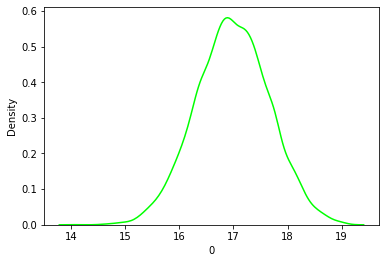

In [48]:
sns.distplot(data_sample_r[0] , color = 'lime' , hist=False)